0.9092416909147352
0.9247010159384792
0.424552742939411
0.9539868678814153
0.4741738880132876
0.1312072541335312
0.13207879819638108
0.05600638254706462
0.44887691644778754
0.5228462117375589
0.2086877095994312
0.028018328588561046
0.49316740787444785
0.2713009712199009
0.22681060864267746
0.1704466788732853
0.08509486016774775
1.1119575106323205
0.06152384505158351
0.3546897938343535
0.34315770712540494
0.54433897229249
0.46995599026032087
0.07009093507155821
0.48804731705586313
0.18401322435286782
0.16790484261444735
0.47134828685744107
0.5222434015776904
0.24522538999025814
0.4092297338379466
0.011596680021115576
0.2928339609454966
0.3814533743300144
0.04305659922878051
1.480779933045341
0.3049452094060451
0.06656164292527861
0.02732588682875496
0.03147023413428731
0.22663882100006508
0.05116320509280104
0.4653860121051115
0.12052611954435244
0.09343653298431255
0.3537798074056819
0.13868884315094615
0.21797319244146543
0.24529381853290494
0.20730112186679917
0.31650730269690913
0.3

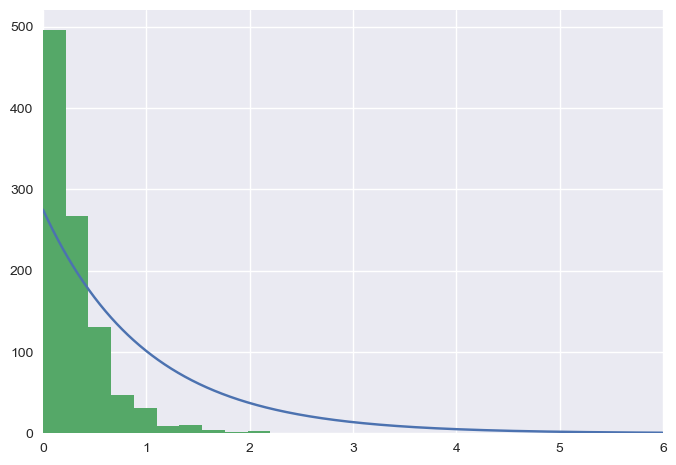

In [125]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy.stats import norm
import scipy.integrate as integrate

#how to include optional arguments in a function
muA = 1.673/100 #cm^-1/100
muS = 312.0/100 # cm^-1/100
g = 0.90
nt = 1.33
Nphotons = 10000#* set number of photons in simulation */
radial_size = 2.0#* cm, total range over which bins extend */
NR = 1000#* set number of bins. */

def step_size_txt():
    random = np.random.uniform(0,1)
    coef = muA + muS
    step_size = -np.log(random)/coef
    print(step_size)
    return step_size
def p(x1,opt):
    x1 = x1
    x2 = opt
    distribution_function = lambda x: norm.pdf(x, 0.1)


    print('probability to fall between {0} and {1} :'.format(x1, x2), integrate.quad(distribution_function, x1, x2)[0])
    step = 0.001
    whole_x = np.arange(-4, 4, step)
    whole_y = list(map(distribution_function, whole_x))

    needed_x = np.arange(x1, x2, step)
    needed_y = list(map(distribution_function, needed_x))
    plt.plot(whole_x, whole_y)
    plt.fill_between(needed_x, needed_y)


def random(coef):
    random = np.random.uniform(0,1)
    x = 1-np.exp(-random*coef)
    return random
    # p(x1, x2)
def step_size(n, coef):
    random = np.random.uniform(0,1)
    step_size = -np.log(random)/(muA + muS)
    
    return step_size

def step_hist(n, coef, plot=False):
    histogram = np.array([])
    for i in range(n):
        histogram = np.append(histogram, step_size_txt())
    if plot:

        plt.hist(histogram, )
    return histogram
def curve_plot(n, coef, plot=False):
    x = np.arange(0, 6, 6/n)
    ds1 = 0.275

    function = lambda x: 1000*np.exp(-x)*ds1/1
    return x, function(x)

plt.plot(curve_plot(1000, 1)[0], curve_plot(1000, 1)[1])

x = step_hist(1000, .275, plot=True)
6/1000

print(np.mean(x))


plt.xlim(0, 6)
plt.show()

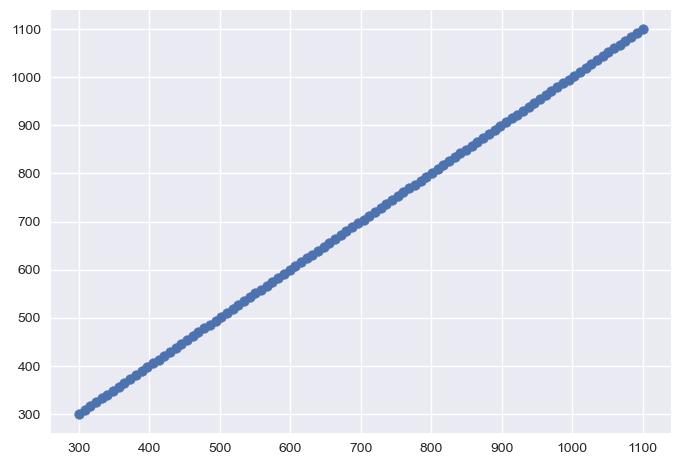

In [95]:
# nm = 400
# muBaseLine = 0.244 + 85.3*np.exp(-(nm - 154)/66.2)
# print(muBaseLine)
bl = np.empty(100)
mel = np.empty(100)
epi = np.empty(100)

fmel = 10
x = np.empty(100)
for nm in range(300,1100,100):
    # 0.244 + 85.3exp(-(nm - 154)/66.2)
    muBaseLine = 0.244 + 85.3*np.exp(-(nm - 154)/66.2)
    #(6.6 x 10^11)(nm^(-3.33))
    muMelanin = (6.6*10**11)*(nm**(-3.33))
    #mua.epi  =  (f.mel)(mua.mel)  +  (1 - f.mel)(mua.skinbaseline)
    muEpi = (fmel*muMelanin) + ((1-fmel)*muBaseLine)

    
    np.append(bl, muBaseLine)
    np.append(mel, muMelanin)
    np.append(epi, muEpi)
    np.append(x, nm)

plt.scatter(x,epi)
plt.yscale('linear')
plt.xscale('linear')